Mean squared error: 12.425274848937988
R-squared: 0.7641493740399432

In [1]:
import pandas as pd
import numpy as np
import os

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt

import joblib

In [2]:
pd.options.display.max_columns = 20000

In [3]:
# Load the dataset using pandas
input = pd.read_feather('C:/Users/Peter/Documents/GitHub/MTG-Land-Recommender/data/input.feather')
output = pd.read_feather('C:/Users/Peter/Documents/GitHub/MTG-Land-Recommender/data/output.feather')

In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(input, output, test_size=0.2, random_state=42)

In [5]:
# Define the neural network architecture
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model with optimizer and loss function
model.compile(optimizer='adam', loss='mse')

# Train the model with the training set
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
233/233 [==============================] - 1s 939us/step - loss: 92.5446
Epoch 2/100
233/233 [==============================] - 0s 836us/step - loss: 40.6399
Epoch 3/100
233/233 [==============================] - 0s 894us/step - loss: 33.3864
Epoch 4/100
233/233 [==============================] - 0s 930us/step - loss: 29.9604
Epoch 5/100
233/233 [==============================] - 0s 878us/step - loss: 27.4639
Epoch 6/100
233/233 [==============================] - 0s 843us/step - loss: 25.3673
Epoch 7/100
233/233 [==============================] - 0s 890us/step - loss: 24.2111
Epoch 8/100
233/233 [==============================] - 0s 850us/step - loss: 22.5440
Epoch 9/100
233/233 [==============================] - 0s 828us/step - loss: 21.0687
Epoch 10/100
233/233 [==============================] - 0s 834us/step - loss: 20.5428
Epoch 11/100
233/233 [==============================] - 0s 835us/step - loss: 18.9216
Epoch 12/100
233/233 [==============================] - 0s 839u

In [6]:
# Evaluate the accuracy of the model with the testing set
mse = model.evaluate(X_test, y_test)
print('Mean squared error:', mse)

59/59 [==============================] - 0s 725us/step - loss: 12.5364
Mean squared error: 12.536429405212402


In [7]:
# Use the trained model to make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate the R-squared metric between the predicted and actual values
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

59/59 [==============================] - 0s 692us/step
R-squared: 0.7620395414293224


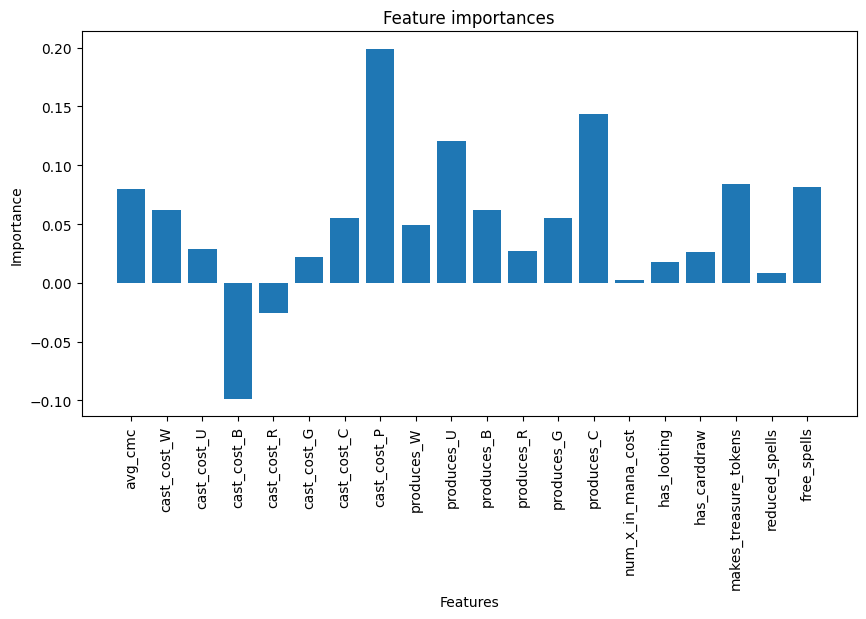

In [8]:
# Get the weights of the model's layers
weights = model.get_weights()

# Extract the weights of the input layer and the first dense layer
input_weights = weights[0]
dense_weights = weights[1]

# Calculate the absolute weights of the input features
abs_input_weights = np.abs(input_weights)

# Multiply the absolute weights of the input features with the weights of the first dense layer
feature_importances = np.dot(abs_input_weights, dense_weights)

# Normalize the feature importances
feature_importances /= np.sum(feature_importances)

# Get the feature names from the original dataset
feature_names = input.columns

# Plot the feature importances in a bar chart
plt.figure(figsize=(10, 5))
plt.bar(range(input.shape[1]), feature_importances)
plt.xticks(range(input.shape[1]), feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature importances')
plt.show()

In [9]:
joblib.dump(model, 'C:/Users/Peter/Documents/GitHub/MTG-Land-Recommender/nn_lin_nfe_model.joblib')

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-03-23 18:12:10         1799
metadata.json                                  2023-03-23 18:12:10           64
variables.h5                                   2023-03-23 18:12:10        60616


['C:/Users/Peter/Documents/GitHub/MTG-Land-Recommender/nn_lin_nfe_model.joblib']